In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [118]:
df=pd.read_csv('winequality.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [119]:
df.shape

(1599, 12)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [121]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [122]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<AxesSubplot:>

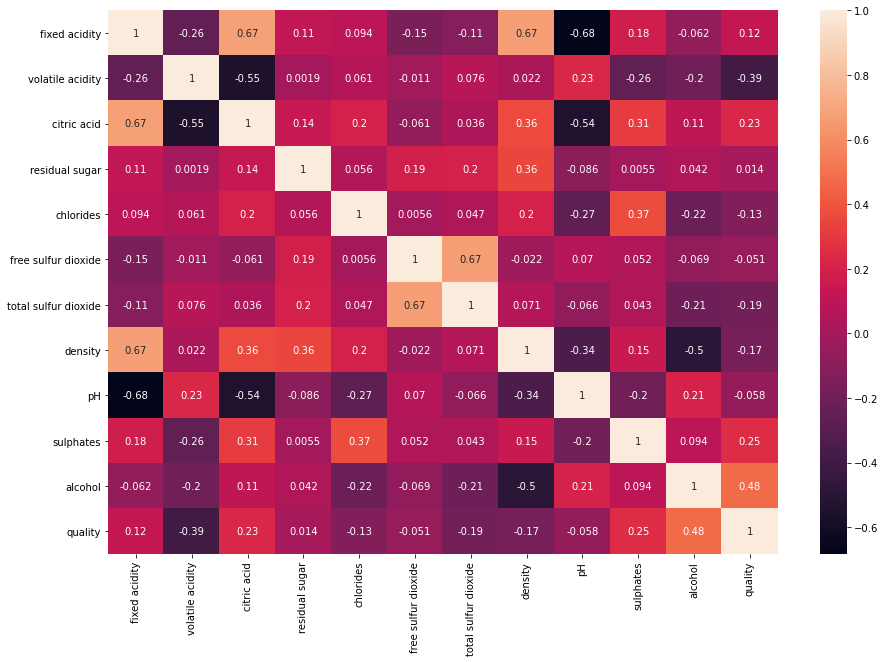

In [123]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

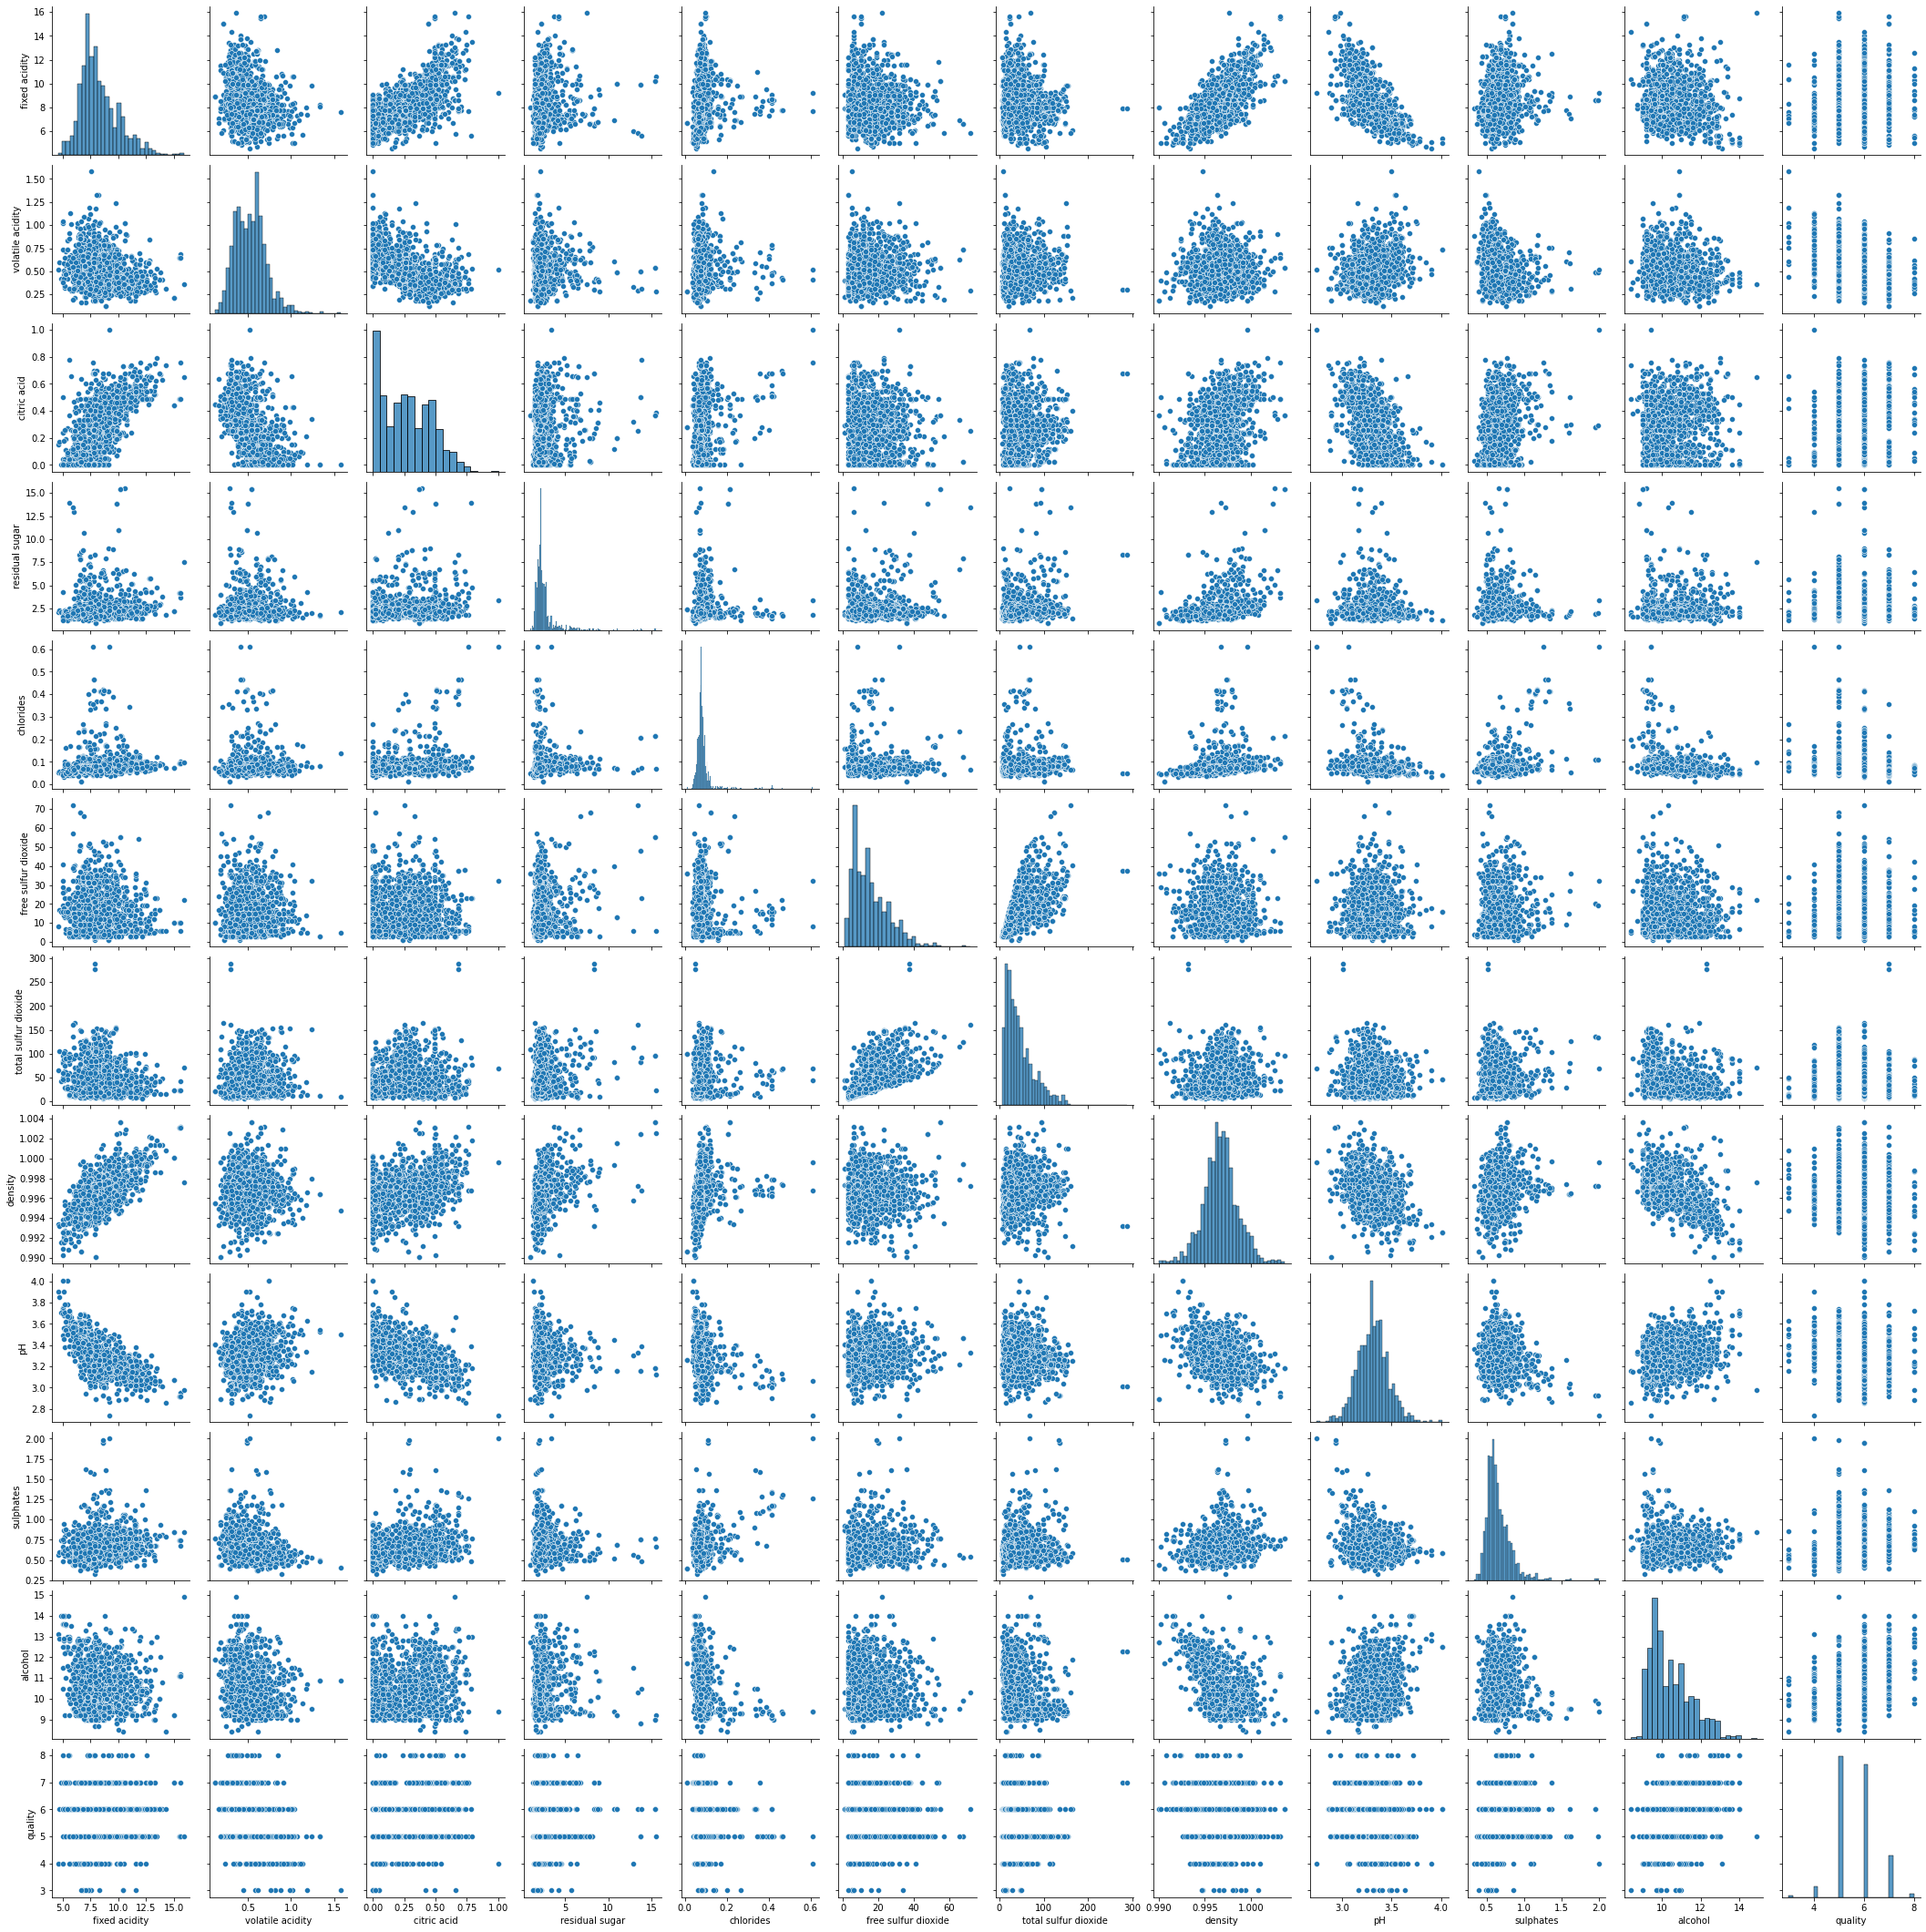

In [124]:
sns.pairplot(df)

<AxesSubplot:xlabel='quality', ylabel='count'>

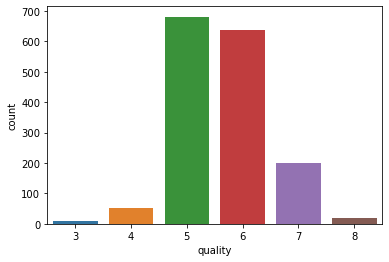

In [125]:
sns.countplot(df['quality'],data=df)

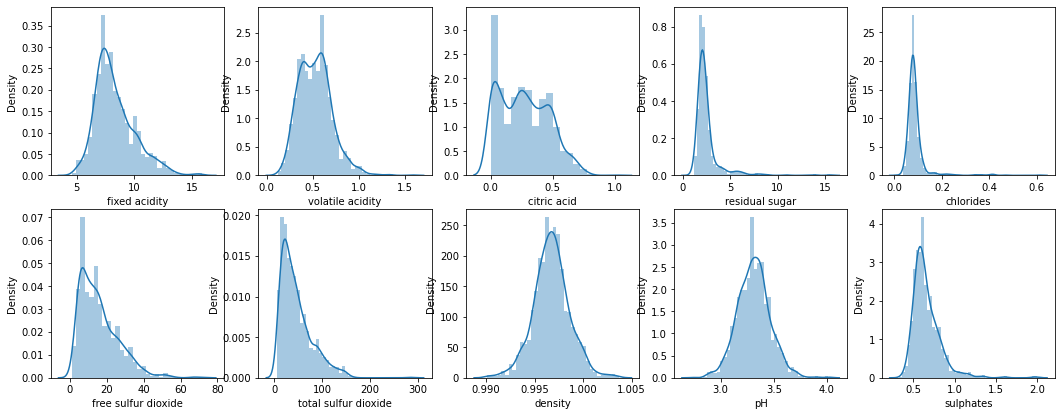

In [126]:
## Checking Distribution of data
plt.figure(figsize=(18,18))
plot=1
for col in df:
    if plot<=10:
        plt.subplot(5,5,plot)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=10)
    plot+=1
plt.show()    
    

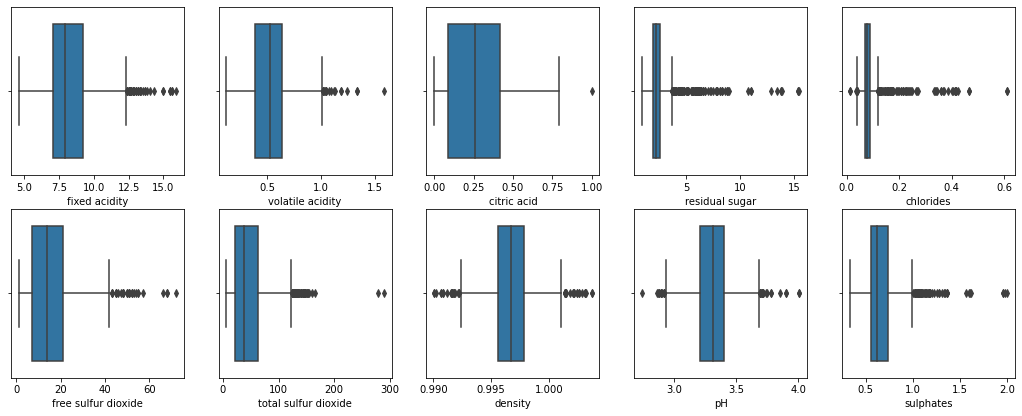

In [127]:
plt.figure(figsize=(18,18))
plot=1
for col in df:
    if plot<=10:
        plt.subplot(5,5,plot)
        sns.boxplot(df[col])
        plt.xlabel(col,fontsize=10)
    plot+=1
plt.show() 

In [128]:
## Removing outliers
from scipy.stats import zscore
z_scr=zscore(df)
print(df.shape)
df_2=df.loc[(abs(z_scr)<3).all(axis=1)]
print(df_2.shape)

(1599, 12)
(1451, 12)


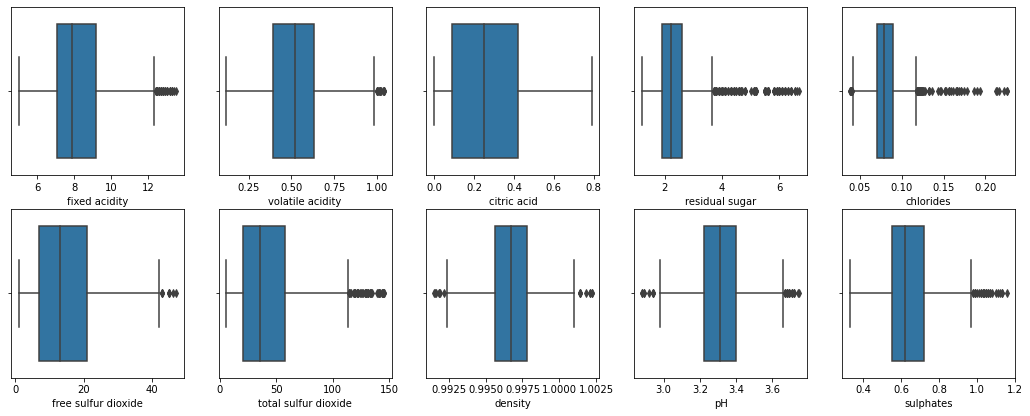

In [129]:
plt.figure(figsize=(18,18))
plot=1
for col in df_2:
    if plot<=10:
        plt.subplot(5,5,plot)
        sns.boxplot(df_2[col])
        plt.xlabel(col,fontsize=10)
    plot+=1
plt.show()

In [98]:
##Changing to Binary clasification Problem

In [135]:
bins=(2,6.5,8)
labels=['bad','good']
df['quality']=pd.cut(df['quality'],bins=bins,labels=labels)
df_2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [136]:
df_2.skew()

fixed acidity           0.823934
volatile acidity        0.380659
citric acid             0.291297
residual sugar          2.456107
chlorides               2.275162
free sulfur dioxide     0.869250
total sulfur dioxide    1.183161
density                 0.055738
pH                      0.114705
sulphates               0.891492
alcohol                 0.758958
dtype: float64

In [139]:
df_3=df_2.drop('quality',axis=1)
y=df_2[['quality']]
for i in df_3:
    if df_3[i].skew()>=.55:
        df_3[i]=np.cbrt(df_3[i])
    if df_3[i].skew()<=-.55:
        df_3[i]=np.cbrt(df_3[i])

In [140]:
df_3.skew()

fixed acidity           0.529105
volatile acidity        0.380659
citric acid             0.291297
residual sugar          1.359704
chlorides               0.664570
free sulfur dioxide     0.125799
total sulfur dioxide    0.342621
density                 0.055738
pH                      0.114705
sulphates               0.523901
alcohol                 0.610368
dtype: float64

In [142]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaled=ss.fit_transform(df_3)
x_scaled=pd.DataFrame(x_scaled,columns=df_3.columns)

In [149]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)


In [144]:
## model Building
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score
from sklearn.model_selection import train_test_split,cross_val_score

In [156]:
def maxroc_auc(model,df_3,y):
    x_train,x_test,y_train,y_test=train_test_split(df_3,y,random_state=43,test_size=.20,stratify=y)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print('Roc_Auc socre:',roc_auc_score(y_test,y_pred))
    print('Mean Cross validation score:',cross_val_score(model,df_3,y,cv=10,scoring='roc_auc').mean())
    print('Standard Deviation of Cross val:',cross_val_score(model,df_3,y,cv=10,scoring='roc_auc').std())
    print('Cross Val score:',cross_val_score(model,df_3,y,cv=10,scoring='roc_auc'))

In [157]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
lg_clf=LogisticRegression()
maxroc_auc(lg_clf,x_scaled,y)

Roc_Auc socre: 0.7300796812749004
Mean Cross validation score: 0.8917085714285713
Standard Deviation of Cross val: 0.041923588022175086
Cross Val score: [0.90628571 0.9148     0.9104     0.888      0.966      0.8616
 0.816      0.9108     0.9112     0.832     ]


In [158]:
## Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
maxroc_auc(dt_clf,df_3,y)

Roc_Auc socre: 0.7556274900398408
Mean Cross validation score: 0.6699428571428572
Standard Deviation of Cross val: 0.06819548132735326
Cross Val score: [0.54761905 0.688      0.742      0.614      0.705      0.723
 0.712      0.728      0.68       0.619     ]


In [162]:
## Random Forest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rd_clf=RandomForestClassifier()
param={'criterion':['entropy','gini'],'n_estimators':[10,50,100,500]}
clf=GridSearchCV(rd_clf,param,cv=5,scoring='roc_auc')
clf.fit(df_3,y)
print(clf.best_params_)

{'criterion': 'entropy', 'n_estimators': 500}


In [163]:
rd_clf=RandomForestClassifier(n_estimators=500,criterion='entropy')
maxroc_auc(rd_clf,df_3,y)

Roc_Auc socre: 0.7650398406374502
Mean Cross validation score: 0.8820666666666666
Standard Deviation of Cross val: 0.05246686192255069
Cross Val score: [0.90190476 0.9572     0.9208     0.8874     0.96       0.8406
 0.7874     0.8818     0.9124     0.8272    ]


In [164]:
##Knn
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier(n_neighbors=15)
maxroc_auc(knn_clf,x_scaled,y)

Roc_Auc socre: 0.6655876494023906
Mean Cross validation score: 0.8367361904761905
Standard Deviation of Cross val: 0.05736796581752588
Cross Val score: [0.8247619 0.8594    0.8282    0.8616    0.9008    0.8442    0.7526
 0.8616    0.9144    0.7198   ]


In [166]:
###SVM
from sklearn.svm import SVC
svc_clf=SVC()
param={'kernel':['linear','rbf','poly'],'C':[.0001,.001,.01,1,10]}
clf=GridSearchCV(svc_clf,param,cv=9,scoring='roc_auc')
clf.fit(x_scaled,y)
print(clf.best_params_)

{'C': 0.01, 'kernel': 'linear'}


In [167]:
svm_clf=SVC(C=.01,kernel='linear')
maxroc_auc(svm_clf,x_scaled,y)

Roc_Auc socre: 0.5
Mean Cross validation score: 0.8850361904761904
Standard Deviation of Cross val: 0.044080402482205114
Cross Val score: [0.8887619 0.9044    0.9024    0.8732    0.9664    0.8604    0.81
 0.9152    0.9096    0.82     ]


In [168]:
## gardient Boosting
from sklearn.ensemble import GradientBoostingClassifier
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
gb_clf=GradientBoostingClassifier()
clf = GridSearchCV(gb_clf, parameters, cv=5,scoring="roc_auc")
clf.fit(x_scaled,y)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [169]:
gb_clf=GradientBoostingClassifier(n_estimators=100,learning_rate=.1)
maxroc_auc(gb_clf,x_scaled,y)

Roc_Auc socre: 0.7650398406374502
Mean Cross validation score: 0.8789199999999999
Standard Deviation of Cross val: 0.06012241733884847
Cross Val score: [0.87257143 0.9516     0.8824     0.8756     0.9824     0.8376
 0.756      0.8708     0.9212     0.8348    ]


# Hence ,Random Forest is our best Model!!!

In [184]:
x_train, x_test, y_train, y_test = train_test_split(df_3, y,random_state =43,test_size=0.20,stratify=y)
rd_clf=RandomForestClassifier(n_estimators=500,criterion='entropy')
rd_clf.fit(x_train,y_train)
y_pred=rd_clf.predict(x_test)

In [185]:
#Lets print auc roc score and confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
matrix=confusion_matrix(y_test,y_pred)
print("f1 score is : ",f1_score(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print("AUC ROC Score: ",roc_auc_score(y_test,y_pred))


Confusion matrix 
 [[245   6]
 [ 19  21]]
f1 score is :  0.6268656716417911
classification report 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       251
           1       0.78      0.53      0.63        40

    accuracy                           0.91       291
   macro avg       0.85      0.75      0.79       291
weighted avg       0.91      0.91      0.91       291

AUC ROC Score:  0.7505478087649402


# Saving Our Model


In [186]:
import pickle
file='winequality_rf.pkl'
pickle.dump(rd_clf,open(file,'wb'))